In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Generate sample data
np.random.seed(42)
data = pd.DataFrame({
    "feature_1": np.random.normal(0, 1, 1000),
    "feature_2": np.random.exponential(2, 1000)
})

print(data["feature_1"])
print(f"Min: {min(data["feature_1"])}")
print(f"Max: {max(data["feature_1"])}")

Matplotlib is building the font cache; this may take a moment.


0      0.496714
1     -0.138264
2      0.647689
3      1.523030
4     -0.234153
         ...   
995   -0.281100
996    1.797687
997    0.640843
998   -0.571179
999    0.572583
Name: feature_1, Length: 1000, dtype: float64
Min: -3.2412673400690726
Max: 3.852731490654721


**Histogram - Distribution and shape**
- Check if normally distributed
- Identify skewness
- Find modes

Text(0.5, 1.0, 'Histogram: Shows distribution shape')

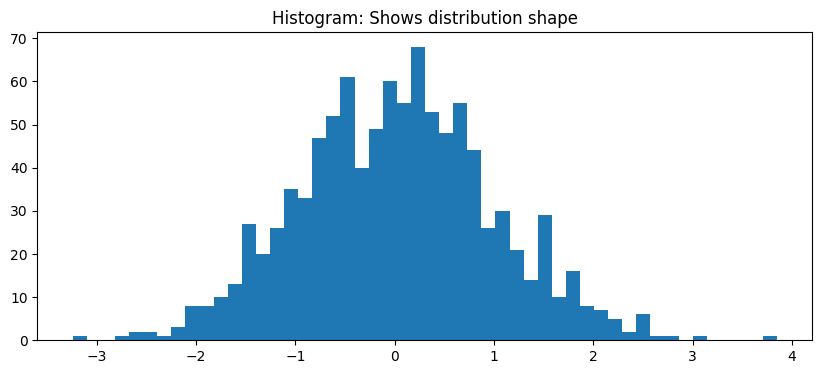

In [2]:
# 1. Histogram - Distribution and shape
plt.figure(figsize=(10, 4))
plt.hist(data["feature_1"], bins=50)
plt.title("Histogram: Shows distribution shape")

**Box plot (Whisker plot) - Summary statistics and outliers**
- Median
- Quartiles
- Outliers
- Data spread

Text(0.5, 1.0, 'Box plot: Shows outliers and quartiles')

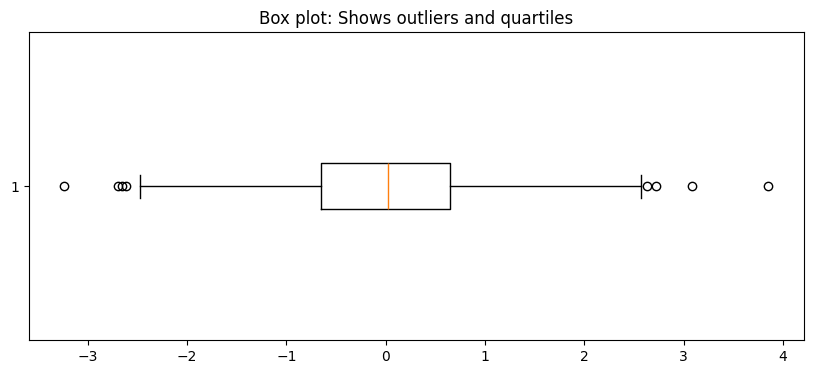

In [3]:
plt.figure(figsize=(10, 4))
plt.boxplot(data["feature_1"], vert=False)
plt.title("Box plot: Shows outliers and quartiles")

**KDE (Kernel Density Estimation) Plot**
- Smooth probability density
- Smoother than histogram
- Better for comparing distributions
- Continuous estimation

**Q-Q Plot - Normal distribution check**
- Check normality
- Identify deviations

((array([-3.19758950e+00, -2.93237785e+00, -2.78437841e+00, -2.67999560e+00,
         -2.59855946e+00, -2.53139899e+00, -2.47402263e+00, -2.42379214e+00,
         -2.37902149e+00, -2.33856546e+00, -2.30160949e+00, -2.26755284e+00,
         -2.23593934e+00, -2.20641415e+00, -2.17869564e+00, -2.15255643e+00,
         -2.12781017e+00, -2.10430217e+00, -2.08190261e+00, -2.06050135e+00,
         -2.04000420e+00, -2.02032992e+00, -2.00140792e+00, -1.98317650e+00,
         -1.96558137e+00, -1.94857451e+00, -1.93211325e+00, -1.91615948e+00,
         -1.90067901e+00, -1.88564107e+00, -1.87101783e+00, -1.85678408e+00,
         -1.84291686e+00, -1.82939524e+00, -1.81620005e+00, -1.80331371e+00,
         -1.79072004e+00, -1.77840415e+00, -1.76635224e+00, -1.75455157e+00,
         -1.74299028e+00, -1.73165738e+00, -1.72054262e+00, -1.70963644e+00,
         -1.69892989e+00, -1.68841463e+00, -1.67808281e+00, -1.66792707e+00,
         -1.65794051e+00, -1.64811661e+00, -1.63844924e+00, -1.62893261e+00,

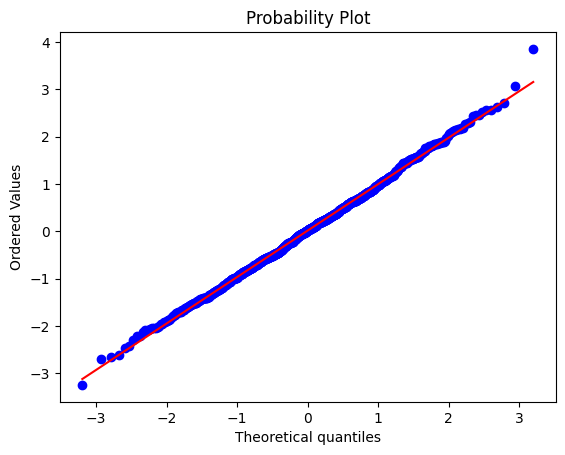

In [4]:
from scipy import stats

stats.probplot(data["feature_1"], dist="norm", plot=plt)

**MinMaxScaler (Normalization)**
- Neural networks
- When bounded range is needed
- When preserving zero values is important

**StandardScaler (Standardization)**
- Linear models (Linear/Logistic Regression)
- When normal distribution is assumed
- When outliers present

In [5]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# MinMaxScaler (Normalization)
"""
Formula: X_scaled = (X - X_min) / (X_max - X_min)
Range: [0, 1]
"""
minmax = MinMaxScaler()
data_normalized = minmax.fit_transform(data)

# After normalization
# print(data_normalized)

# StandardScaler (Standardization)
"""
Formula: X_scaled = (X - mean) / std
Result: mean=0, std=1
"""
standard = StandardScaler()
data_standardized = standard.fit_transform(data)

# After standardization
print(data_standardized)
print(f"Standard deviation: {np.std(data_standardized)}")
print(f"Mean: {np.mean(data_standardized)}")

[[ 0.48775857 -0.82263899]
 [-0.1610219  -0.89531058]
 [ 0.64201457  0.00378876]
 ...
 [ 0.63502009 -0.28043434]
 [-0.60334651 -0.99997809]
 [ 0.5652763  -0.99781094]]
Standard deviation: 1.0
Mean: -3.153033389935444e-17


**Pearson correlation (Linear Correlation)**
- Measures linear relationships
- Range: [-1, 1]
- Assumptions: Linear assumption, Normal distribution

**Spearman correlation (Non-linear Correlation)**
- Measures monotonic relationships
- No distribution assumption
- Based on ranks

In [6]:
pearson_corr = data.corr(method="pearson")
print(f"Linear correlation coefficient (PCC):\n{pearson_corr}\n")

spearman_corr = data.corr(method="spearman")
print(f"Spearman correlation coefficient:\n{spearman_corr}\n")

Linear correlation coefficient (PCC):
           feature_1  feature_2
feature_1   1.000000  -0.008813
feature_2  -0.008813   1.000000

Spearman correlation coefficient:
           feature_1  feature_2
feature_1   1.000000   0.036979
feature_2   0.036979   1.000000



**Handling Missing Values (NaNs)**

**1) Mean Imputation**

Use when:
- Data is normally distributed
- Missing at random

**2) Median Imputation**

Use when:
- Data has outliers
- Skewed distribution

**3) Random Sampling**

Use when:
- Want to preserve distribution
- More sophisticated approaches needed

In [7]:
# Create data with NaNs
data_with_nans = data.copy()
data_with_nans.loc[np.random.choice(data.index, 100), "feature_1"] = np.nan

# 1. Mean Imputation
mean_imputed = data_with_nans["feature_1"].fillna(data_with_nans["feature_1"].mean())

# 2. Median Imputation
median_imputed = data_with_nans["feature_1"].fillna(data_with_nans["feature_1"].median())

# 3. Random Sampling
def random_imputation(series):
    non_null_values = series.dropna().values
    return series.apply(lambda x: np.random.choice(non_null_values) if pd.isna(x) else x)

sampled_imputed = random_imputation(data_with_nans["feature_1"])

**Benefits of Correlated Features Reduction**
- Reduces multicollinearity (two or more features having high relationship with one another)
- Improves model stability
- Reduces overfitting

In [8]:
def remove_correlated_features(df, threshold=.95):
    corr_matrix = df.corr().abs()
    upper = corr_matrix.where(
        np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
    )
    to_drop = [column for column in upper.columns
                if any(upper[column] > threshold)]
    return df.drop(to_drop, axis=1)

reduced_df = remove_correlated_features(data)

**Box Plot Method (IQR)**
- Use it when there are non-normal distributions and the data is robut to extreme values

**Z-score method (3-sigma rule)**
- Use it when there is normal distribution

In [9]:
# 1. Box Plot Method (IQR)
def detect_outliers_iqr(data):
    Q1 = data.quantile(.25)
    Q3 = data.quantile(.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (data < lower_bound) | (data > upper_bound)

# 2. Z-score Method (3-sigma rule)
def detect_outliers_zscore(data, threshold=3):
    z_scores = (data - data.mean()) / data.std()
    return abs(z_scores) > threshold

outliers_iqr = detect_outliers_iqr(data["feature_1"])
outliers_zscore = detect_outliers_zscore(data["feature_1"])